# Assignment 4: Machine Learning

Please submit this assignment to Canvas as a Jupyter notebook (.ipynb). The assignment begins with introductory material interspersed with optional (but recommended) exercises which will not be graded. The graded assignment may be found at the bottom of the document in the section labeled "Assignment X".

## Introduction to machine learning and scikit-learn

We've learned how to load EEG and task events, extract spectral power, and run univariate statistics to correlate spectral power with episodic memory. But there's also a way to correlate memory with *entire patterns* of neural time series across frequency bands and electrodes. We generally call these "multivariate" methods, but these approaches are more commonly known as **machine learning** (ML).

Don't be intimidated if you've never used machine learning algorithms before. They are often pretty intuitive, and machine learning software packages are mature. It only takes a few lines of code to start using powerful machine learning algorithms. 

**The Big Picture**: The big idea of machine learning is to discover patterns in data. In many ways, machine learning is just a more flexible way of doing statistics, in that it lets us interpret data as it relates to a real-world variable of interest. Most things called "machine learning" take observations of data (called **features**) and use them to make predictions about a variable of interest. In doing so, machine learning models find values for weights, or **parameters**, that can also be useful to data scientists. 

For example, in the last assignment we learned how to correlate power at specific frequencies and channels with subsequent memory. These univariate methods effectively allow us to predict whether a subject will later recall an item on the basis of each individual feature (power at a given frequency and channel) separately. ML algorithms let us use those same data to make stronger predictions about whether an item will be remembered by incorporating information from all features. 

## Linear Regression

Linear regression is the "simplest" kind of machine learning! Note that much of this lesson on linear regression and its text was sourced from: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

In [8]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # suppress annoying deprecation warnings
# make plots appear without a separate plt.show() statement
%matplotlib inline

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In machine learning, we call these tables **"feature matrices."** The *target array*, or set of values we'd like to predict, is often just called "y." For example, if we wanted to predict flower species from flower morphology, the species name would be the y vector.

In [5]:
#Construct a feature matrix without the species
X_iris = iris.drop('species', axis=1)

#Construct the y vector
Y_iris = iris['species']

print(X_iris.shape)

(150, 4)


<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.02-samples-features.png">

### Performing linear regression

1.**Choose a class of model**

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [6]:
from sklearn.linear_model import LinearRegression

2.**Choose model hyperparameters**

An important point is that a class of model is not the same as an *instance* of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

* Would we like to fit for the offset (i.e., y-intercept)?
* Would we like the model to be normalized?
* Would we like to preprocess our features to add model flexibility?
* What degree of regularization would we like to use in our model? 
    * Regularization "smooths" model predictions to prevent "overfitting" to spurious noise patterns.
* How many model components would we like to use?

These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

In [7]:
#We're setting the fit_intercept hyperparameter
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

3.**Arrange data into feature matrix and target vector.**

In [24]:
import numpy as np
import matplotlib.pyplot as plt

#Here, we're going to use synthesized data. Give some random data a slope of 2 and an intercept of -1, and add a bit of noise
np.random.seed(102)  # comment this out to get different results on each run. Leave uncommented for consistent results (useful for debugging)

N = 50
x = 10 * np.random.rand(N)
y = 2 * x - 1 + np.random.randn(N)
plt.scatter(x, y);

#Technically, X needs to be an nx1 shaped array, so...
X = x[:, np.newaxis]
print(X.shape)

(50, 1)


4.**Fit the model!**

In [25]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#Inspect the model parameters
print(model.coef_)
print(model.intercept_)

[2.07570181]
-1.463035291224843


The model found something pretty close to our original parameters!

5.**Predict labels on unknown data**

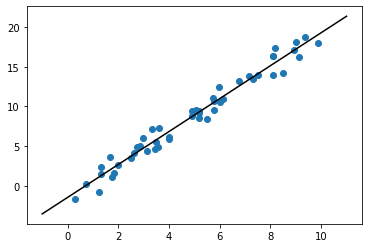

In [33]:
# Plot learned linear relationship
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, 'k');

In [34]:
#Return the R^2 prediction score
print('R^2: '+str(model.score(X, y)))

#Calculate manually
y_pred = model.predict(X)
r2_manual = 1-np.sum((y_pred-y)**2)/np.sum((np.mean(y)-y)**2)

print('R^2 manual: '+str(r2_manual))

#And another way
from scipy.stats import pearsonr
r, p = pearsonr(y_pred, y)
print('r**2: '+str(r**2))

R^2: 0.9700259025262968
R^2 manual: 0.9700259025262968
r**2: 0.9700259025262972


**Exercise: Perform a linear regression to predict petal width from sepal length and septal width in the iris dataset. What is the model performance? (i.e. R^2)**

**Exercise: Use linear regression to estimate the exponent of the power law for electrodes in R1111M.**

1. Select the first 50 electrodes and compute the spectral power for these channels using Morlet wavelets for 30 frequencies between 3 and 150 Hz (np.logspace(np.log10(3), np.log10(150), num=30)) for 1600 ms analysis epochs beginning at the onset of each WORD event with buffers of 1000 ms. 

2. Fit a regression of $\log(power) \sim \log(freq)$ for each electrode and obtain an estimate for $\alpha$, where $\alpha$ is the exponent in $ power \sim 1/freq^\alpha$

3. Plot the distribution of $\alpha$ across these 50 electrodes. How consistent are the $\alpha$'s across these electrodes? 

## Logistic Regression

Linear regression allows us to predict a continuous outcome $y$ (with normally distributed errors) from a set of features $x$. However many estimation problems, known as classification problems, involve predicting discrete outcomes (e.g. 'pass' vs. 'fail' or 'recalled' vs. 'not') rather than continuous ones. Logistic regression is a classification method that estimates the probability $p$ that an observation belongs to one of two discrete classes from the observed features $x$. Here we will use logistic regression to predict whether subjects will recall an item during a free recall task based on EEG features recorded when the item was presented. In logistic regression, we model the probability of a binary event occurring by mapping a weighted sum of features to a value ranging from 0 to 1 with the logistic function or sigmoid shown here for the "logistic model" for a single feature $x$:

<img src="https://www.saedsayad.com/images/LogReg_1.png">

A trained classification model or classifier will typically output a continuous "score" that quantifies how confident the classifier is that an observation belongs to a given class. A predictive threshold is then set to maximize some classification performance metric. In the case of logistic regression, the predictive "score" is the predicted probability $p$, and the threshold is commonly set to 0.5: simply predict a label of '1' if the predicted probability is greater than 0.5 (more likely than not) and '0' otherwise. The threshold more generally is selected in part based on the relative proportions of the two classes in the training data (i.e., if there are far more "passes" than "fails" in the data, the classifier will tend to predict "passes" and require more evidence to predict "fail").

### Example: Breast Cancer Status Clasification

In [99]:
# load data of observations of health indicators with outcomes of whether or not a tumor is malignant.
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

In [22]:
X.shape

(569, 30)

In [23]:
y.shape

(569,)

### Preparing the feature matrix

Typically, a feature matrix is a 2D array, with observations as rows and features as columns. You can have as many observations and features as available, but keep in mind that too many features relative to the number of observations can cause issues down the road. If you have many observations and only a handful of features, that should not be a problem. 

It's often good practice to have features standardized/normalized. This ensures features will tend to fall in similar ranges of values, making them more comparable.

Text(0, 0.5, 'Observations')

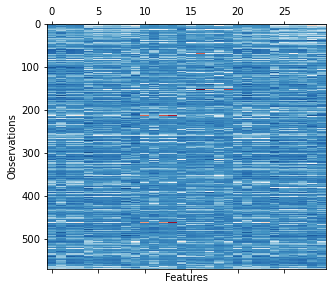

In [18]:
# z-score features to make them comparable and visualize
X = (X - X.mean(axis=0)) / X.std(axis=0, ddof=1)

import numpy as np
plt.figure(figsize=(5, 4.5))
ax = plt.subplot(111)
plt.matshow(X, aspect='auto', cmap='RdBu_r', 
            vmin=np.min(X), vmax=np.max(X), 
            fignum=0)
plt.xlabel('Features')
plt.ylabel('Observations')

### Fitting a model on training data: Hyperparameters

Solely for instructional purposes, we're going to do something bad: We're going to train a logistic regression model and test it on the same data. In a real-world machine learning setting, you would almost never do this, because the model will be **overfit** to the training data. That is, it will show a much higher performance than it would in real-world tests on held-out datasets (datasets which were not trained on).

Key things to know about fitting a logistic regression model: 

* **Penalty parameter**: The degree to which the model discounts the contribution of each observation, as a first line of defense against overfitting. This is usually called 'C' in sckikit-learn functions. 
* **Regularization method**: The manner in which weights are discounted, called 'penalty' in sckikit-learn. For many purposes in the lab, you may want to use the 'l2' norm, which means that weights are penalized according to their squared magnitude. In other words, the larger the coefficient, the more it will be penalized.

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

#How to fit a logistic regression model using scikit-learn
#class_weight helps to adjust for the fact that the number of remembered and not-remembered items are very unequal or imbalanced. 
lr_classifier = LogisticRegression(C=100, penalty='l2', class_weight='balanced', solver='liblinear')
lr_classifier.fit(X, y)

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Computing an AUC and plotting ROC curves

How do we assess how well our classifier is doing? We could simply ask for percent correct -- what proportion of the total items did the classifier guess correctly? The problem with this approach is that it does not account for the different *ways* in which a classifier can be correct or incorrect. For instance, if there are far more samples with one class label than another, the classifier could simply always predict the more common label and achieve a high accuracy while learning little about the underlying data. What we really want to know is, how well does our classifier *distinguish* between two groups on the basis of the observed features?

The solution is to measure the **area under the receiver operating characteristic curve**. Let's unpack what this means! 

A classifier has: 

* A True Positive Rate (TPR): The rate at which the classifier says "1" when the truth is "1." Also called **sensitivity**.
* A False Positive Rate (FPR): The rate at which the classifier says "1" when the truth is "0." This is captured by 1-**specificity**. 

<br>
<center>
<img src="https://acutecaretesting.org/-/media/acutecaretesting/articles/table-i-comparing-a-method-with-the-clinical-truth.gif?w=300&h=193&as=1&la=en">
</center>
<br>

Ideally, a classifier can fully separate true and false data. That is, it won't say "1" when the truth is a zero, but will say "1" when the truth is a "1". Note that a classifier could correctly identifiy every single "1", but if it's also saying "1" in response to a bunch of zeros, it isn't a very useful classifier! That is, **we want classifiers with high sensitivity (true positives) but also low 1-specificity (false positives).** The ROC is a way of measuring such performance, by **explicitly graphing the tradeoff between sensitivity and specificity at various thresholds.**

<br>
<center>
<table>
    <tr>
        <th><img src="https://cdn-images-1.medium.com/max/1600/1*yF8hvKR9eNfqqej2JnVKzg.png"></th>
        <th><img src="https://cdn-images-1.medium.com/max/800/1*-tPXUvvNIZDbqXP0qqYNuQ.png" width=250></th>
    </tr>
</table>
</center>

As you sweep the threshold across the two distributions, the TPR and FPR are measured at each point, and plotted against each other on 2D axes. After sweeping through the entire range, you're left with an ROC curve -- each point at the end must exist at [0, 0] and [1, 1], because we are either completely guessing "True" or completely  guessing "False." The shape of the curve in the middle tells you how good the classifier is.

The **AUC** is a single number that quantifies the curve's shape. If the AUC is 0.5, that means it lies flat along the diagonal, and our two distributions are overlapping; TPR and FPR are the same at every threshold. If the AUC is 1, that means our two distributions are completely non-overlapping, and a single threshold can perfectly distinguish between them with no errors. (An AUC of zero would mean the classifier is able to distinguish the two classes, but is flipping the label!)

In [75]:
#scikit-learn makes it very easy to get AUCs and ROCs

prob_array = lr_classifier.predict_proba(X)[:,1]
auc = roc_auc_score(y, prob_array)
print(auc)

0.9992732942233498


Text(0.5, 1.0, 'Training Data ROC-curve')

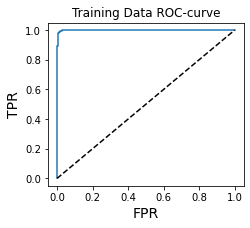

In [76]:
roc_curve_data_train = roc_curve(y, prob_array)
fpr_train = roc_curve_data_train[0]  #false positive rate
tpr_train = roc_curve_data_train[1]  #true positive rate

#Plot results
plt.figure(figsize=(3.5, 3))
ax = plt.subplot(111)
plt.plot(fpr_train, tpr_train)
plt.plot((0.0,1.0),(0.,1.),'k--')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.title('Training Data ROC-curve')

**Exercise: How does the ROC curve/AUC change as a function of the penalty parameter? Vary the penalty across several orders of magnitude.**

**Exercise: Randomly select a subset of features from the feature matrix, and recompute the AUC. How does AUC change as a function of the number of features?**

## Visualizing classifier output

For logistic regression classifier we estimate probabilities that a given event belongs to a class of recalled events. The probability formula is given by:

$P(x)=\left({1+e^{-\left(B+\sum w_i x_i\right)}}\right)^{-1}$

which implies that we are looking for a dividing hyperplane that will separate recalled and non-recalled events. Every point along this hyperplane is assigned the same confidence score by the classifier as described earlier. This score is specifically the classification threshold. The equation of this hyperplane is simply

$B+\sum w_i x_i = 0$

where $B$ is the intercept and $w_i$'s are weights coefficients fitted by Logistic Regression algorithm. $x_i$'s are features of the classifier - in our case $x_i$'s denote mean powers for the i-th combination of spectral frequency and bipolar pair. While ROC and AUC can give you a sense of classifier performance, sometimes it is nice to be able to visualize how well the dividing hyperplane separates data points belonging to thtw two classes (here recalled vs non recalled) We can do it by projecting N dimensional space into two dimennsions and plot dividing plane as well as individual , color-coded events. Let's rewrite $B+\sum w_i x_i = 0$ as 

$ B+X+Y = 0 $ where $X = \sum_{i=0}^{i=200} w_i x_i$ and $Y = \sum_{i=201}^{i=N} w_i x_i$. The number 200 is arbitrary here. The idea is that we can treat a weighted sum of first n features as one variable and the weighted sum of the remaining features as another variable and plot those on a scatter plot. Here $n=200$, and $N$ denotes total number of features. Since $ B+X+Y = 0 $ is the exponent in the logistic probability function, the line along which the probability of the data point belonging to either class is exactly 0.5 (the threshold) is called the dividing line. The equation of the dividing line is exactly 

$ B+X+Y = 0 $ 

because when the exponent is $0$,

$P(x)=\left({1+e^{-0}}\right)^{-1}=0.5$

Now, the data points that lie above the dividing line will get assigned high probability (here, of being recalled) and those that lie below will get assigned low probability

Text(0.5, 1.0, 'Distribution of classifier weights')

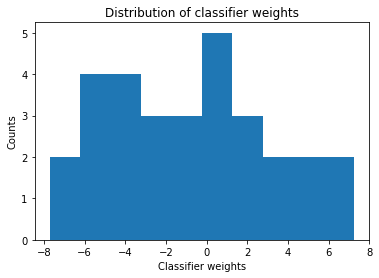

In [77]:
# Inspect the classifier weights.
w_tmp = np.squeeze(lr_classifier.coef_)
plt.hist(w_tmp)
plt.xlabel('Classifier weights')
plt.ylabel('Counts')
plt.title('Distribution of classifier weights')

In [78]:
# For demonstration purposes, take the weighted sum of the first chunk
# of features as X values and last chunk of features for Y values.
# A quick-and-direct dimensionality reduction of the feature space.

# Create an empty weight object with column for intercept and columns
# for classifier-derived weights.
w = np.zeros(len(w_tmp)+1)
w[0] = lr_classifier.intercept_
w[1:] = w_tmp

# Use dot product to get weighted sum of first 200 features as X
# and remaining features as Y.
x_project = np.dot(X[:,:15], w[1:16])
y_project = np.dot(X[:,15:], w[16:])
ind = y==0

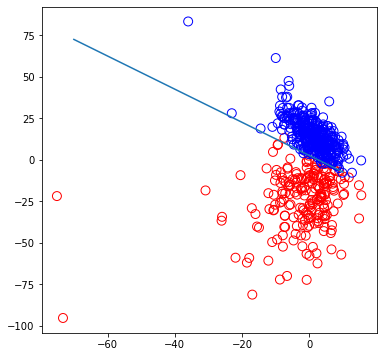

In [86]:
# Plot results.
fig = plt.figure(figsize=(6, 6))

x = np.linspace(-70,10, 100)
plt.plot(x, -w[0]-x)
plt.scatter(x_project[ind], y_project[ind], s=80, facecolors='none', edgecolors='r')
plt.scatter(x_project[~ind], y_project[~ind], s=80, facecolors='none', edgecolors='b')

## Cross-validation

In the previous assignment, we learned how to train a classifier on observed features and labels\. But we trained the classifier and tested its performance on the same dataset, which is very problematic for evaluating the classifier's performance. Why?

Imagine some students went to a review session before an exam, but the teaching assistant leading the review simply gave away all the test questions during the review session. Predictably the students would ace the exam, but would this indicate anything about whether they deeply understood the covered material? Of course not! Even students who understood the material poorly could still memorize a set of arbitrary solutions and regurgitate them.

Similarly, if the purpose of machine learning methods is to make predictions on new data -- e.g. will this subject remember this word? -- then we want to test its performance on new data, i.e., data it hasn't been trained on! Training a model involves finding a very particular set of weights on each feature, and those weights can end up being very specifically tuned to the training data. A classifier will do a great job predicting labels on data it already saw, but it will fail to predict labels for new and somewhat different data.

<center>
<img src="https://cdn-images-1.medium.com/max/800/1*tBErXYVvTw2jSUYK7thU2A.png" width=500>
</center>

In ML parlance, we want our models to avoid **overfitting** the training data and to **generalize** to held-out datasets. Ensuring this generalizability by testing on held-out data is called **validation**. Let's see how it's done!

<center>
<img src="https://cdn-images-1.medium.com/max/800/1*4G__SV580CxFj78o9yUXuQ.png" width=650>
</center>
    
<a href="https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6">Image source</a>


The basic idea to break up our dataset into **train/test splits**. There are many ways to do this: For instance, we could break up the set of observations into K subsets or "folds" and train on the first K-1 folds and test on the remaining fold that was held out. Then we'd have confidence that we'd achieve predictive performance on new data in the real world something much closer to what we see in the hold set that wasn't trained on. You typically want your training set to be bigger than your testing set.

See also here for a good tutorial on nested cross validation for parameter tuning: https://chrisalbon.com/machine_learning/model_evaluation/nested_cross_validation/

In [41]:
# Select our training data events to be a random 80% of the data.
# Remember that the feature matrix is events X features in shape

idx = np.repeat(np.arange(5), len(X)//5 + 1)
idx = np.tile(np.arange(5), len(X)//5 + 1)[:len(X)]
idx = np.random.permutation(idx)
train_mask = idx != 4
X_train = X[train_mask, :]
y_train = y[train_mask]

# Make our testing data from the last session.
X_test = X[~train_mask, :]
y_test = y[~train_mask]

print('Train:'+str(X_train.shape))
print('Test:'+str(X_test.shape))

Train:(456, 30)
Test:(113, 30)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Instantiate the classifier and fit to training data.
C_ = 100
lr_classifier = LogisticRegression(C=C_, penalty='l2', class_weight='balanced', solver='liblinear')
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=100, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [89]:
# Test the model on the held-out data
prob_array = lr_classifier.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, prob_array)
print(auc)

0.9651732797589152


Pretty good, but not as good as the AUC obtained in the previous assignment when we trained and tested on the same dataset. Let's try all possible combinations of leave-one-fold-out train/test splits, and compute the average AUC across all splits.

In [90]:
test_aucs = []
test_rocs = []

# Loop through all possible sessions as the testing set.
for test_idx in np.unique(idx):
    mask = idx == test_idx
    # Make our train/test splits across sessions.
    X_train = X[mask]
    y_train = y[mask]
    
    X_test = X[~mask]
    y_test = y[~mask]
    
    # Fit the classfier to the training set.
    lr_classifier = LogisticRegression(C=C_, penalty='l2', class_weight='balanced', solver='liblinear')
    lr_classifier.fit(X_train, y_train)
    
    # Compute the AUC for each testing set.
    prob_array = lr_classifier.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, prob_array)
    test_aucs.append(auc)
    
    # Compute the ROC for each testing set.
    roc_curve_data = roc_curve(y_test, prob_array)
    test_rocs.append(roc_curve_data)

In [91]:
print(test_aucs)
print(np.mean(test_aucs))

[0.9915169660678643, 0.9932372645683225, 0.9869427811044578, 0.9925665101721439, 0.9651732797589152]
0.9858873603343408


While these are all quite good AUCs, indiciating the classifier can distinguish benign from malignant tumors well above chance, none of them are quite as good as our training-set AUC of 0.9999 from the previous assignment. That's to be expected -- essentially, the classifier overfit to the training data.

Text(0, 0.5, 'TPR')

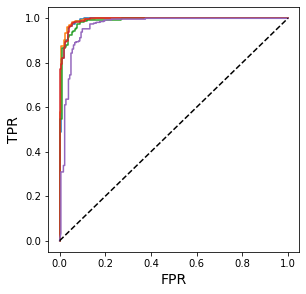

In [92]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # suppress annoying deprecation warnings
import matplotlib.pyplot as plt

# Plot the ROC curve for each held-out session.
plt.figure(figsize=(4.5, 4.5))

for roc_ in test_rocs:
    fpr = roc_[0]
    tpr = roc_[1]
    
    plt.plot(fpr, tpr)

# Make the plot pretty.
plt.plot((0.0,1.0),(0.,1.),'k--')
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)

Awesome! We've got a unique ROC curve for each held-out session. But how do we test the statistical significance of an AUC? What kind of predictability could we have achieved by chance? We could use a permutation test to answer this, but only if we have time!

In [96]:
# Note that k-fold cross validation can be implemented directly in sklearn.
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for train_index, test_index in kf.split([0, 1, 2, 3, 4]):
    print(train_index)
    print(test_index)

[1 2 3 4]
[0]
[0 2 3 4]
[1]
[0 1 3 4]
[2]
[0 1 2 4]
[3]
[0 1 2 3]
[4]


### Feature Selection

**Feature selection** is an important part of designing effective machine learning models. What features are most important for making correct classifications? Are we asking our models to sift through many more feature than are necessary? How do we decide what the best features are? 

There is no "right" way to do feature selection. In fact, some of the best feature selection is done of the basis of your **pre-existing domain knowledge.** We know, for example, that spectral power in frequencies between 3 and 200 Hz are related to episodic memory, so we fed those into our algorithm instead of 1 Hz or 300 Hz activity. Other neuroscientists might have suggested an even smaller range of frequencies! Understanding the data you're working with can really help!

There are also algorithmic approaches to feature selection:

* A common approach to reducing the feature space is **principle components analysis**, or PCA. We don't have time to get into the details, but the big-picture idea is that PCA reduces a high-dimensional matrix to a much lower-dimensional form, by finding a set of orthogonal axes which best capture the variability in the data. 
* You can also select features based on the *univariate* correlation with your dependent variable. We already calculated univariate t-statistics a few days ago! A reasonable approach would be to find the top N features, ranked by their t-statistics, and only select those to enter your feature matrix. 
* *Always* make sure that any feature-selection process you choose is calculated without mixing values between the training and the testing set. Find the best features using the training set, and select those same features in the test set -- no peeking into the test set before you run your model!

#### PCA on the feature matrix

Text(0, 0.5, 'PC2')

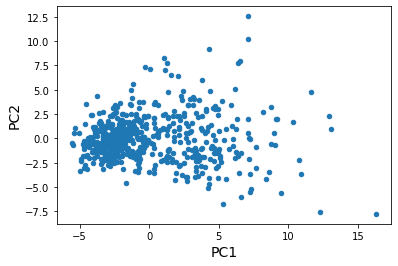

In [97]:
from sklearn.decomposition import PCA

# Instantiate our PCA class.
pca = PCA(n_components=5)

# Reduce the feature matrix to 5 dimensions.
X_red = pca.fit_transform(X)

# Plot the first two principle components.
plt.figure()
plt.scatter(X_red[:, 0], X_red[:, 1], s=20)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)

**Exercise: Re-run logistic regression using the 5 PCA-reduced features. How does model performance compare to the original feature matrix?**

### Ranking by univariate statistics

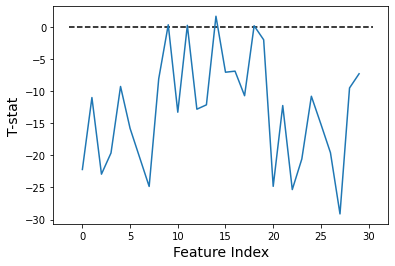

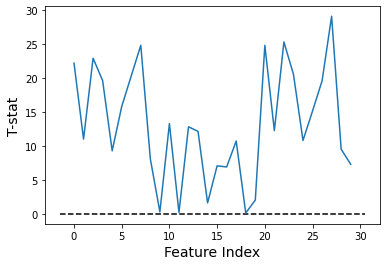

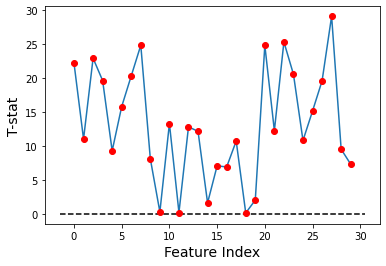

In [98]:
# Basic idea is to find the univariate features that have the best correlation
# with outcome, pick the top N, and use those for classification.

# Run 2-sample t-test between remembered and not-remembered items in the feature matrix.
from scipy.stats import ttest_ind
t, p = ttest_ind(X[y==1, :], X[y==0, :], axis=0, equal_var=False)

# Plot results.
plt.figure()
ax = plt.subplot(111)
plt.plot(t);
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyles='--')
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('T-stat', fontsize=14);

# Since we're interested in the most memory-relevant variables,
# taking the absolute value of the t-stats is helpful.
plt.figure()
ax = plt.subplot(111)
plt.plot(np.abs(t));
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyles='--')
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('T-stat', fontsize=14);

# Rank and select the top 100 most memory-relevant features.
rank_idx = np.argsort(np.abs(t))
picks = rank_idx[-100:]

plt.figure()
ax = plt.subplot(111)
plt.plot(np.abs(t));
plt.plot(picks, np.abs(t)[picks], 'o', color='red')
plt.hlines([0], xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color='k', linestyles='--')
plt.xlabel('Feature Index', fontsize=14)
plt.ylabel('T-stat', fontsize=14);

**Exercise: Feature selection should take place in a cross-validated manner. That is, features should be selected on the basis of training data, and then applied to testing data. Re-write the session-level cross validation with univariate-based feature selection. What happens to classifier performance?**

# Assignment 4: Multivariate and Machine-Learning Analysis of Intracranial EEG Data

This project is designed to familiarize you with multivariate analysis of intracranial EEG data. For each subject, you will train a logistic-regression classifier to discriminate subsequently recalled vs non-recalled studied items using the distribution of spectral power across electrodes as the features. After completing the assignment you should be able to do the following:
* Part 1: Fit an L2-penalized logistic regression classifier to intracranial electrophysiological recordings. Construct a receiver operating characteristic (ROC) curve and compute area under the curve (AUC) to assess classifier performance. Compare train and test performance.
* Part 2: Optimize model penalization parameters using nested cross-validation, specifically focusing on L2 penalization. Compare z-scoring feate
* Part 3: Compare and contrast the performances of classifiers with different penalization schemes such as L1, L2, and elastic net.

For Part 1 and 2, use data from the following 20 FR1/catFR1 subjects in the intracranial EEG (iEEG) dataset.

In [ ]:
subs = ['R1380D', 'R1380D', 'R1111M', 'R1332M', 'R1377M', 
        'R1065J', 'R1385E', 'R1189M', 'R1108J', 'R1390M', 
        'R1236J', 'R1391T', 'R1401J', 'R1361C', 'R1060M', 
        'R1350D', 'R1378T', 'R1375C', 'R1383J', 'R1354E', 
        'R1292E']

All analyses in Part 1 should be performed on all 20 iEEG subjects. For each of these subjects, use the following processing steps:
* Load EEG with CMLReader.load_eeg from a bipolar montage loaded using CMLReader.load('pairs').
* Apply a Butterworth notch filter around 60 Hz (freqs = [58 62]) when extracting the voltage.
* Calculate power at the above frequencies with a Morlet wavelet with wavenumber (keyword “width”) of 6 for each encoding event (from time 0 until 1.6 seconds after the encoding event onset) using a 1 second buffer.
* For each frequency, channel, and encoding event, average the power over the entire 1600 ms encoding period (but not over the buffer period!)
* Log-transform the average encoding power values as in the final step of the previous problem.
* In some cases you may notice artifacts in the data that manifest in power values of zero. These would produce problems in the transformation and classification, so please exclude any events with this issue from all analyses.

## Part 1: Training vs. Testing

For the first part of this assignment, you will train an L2-penalized logistic regression classifier on the time-frequency (TF) data obtained during item encoding for every subject. Throughout this assignment, unless otherwise specified, we will use the default parameters for the *LogisticRegression* classifier in sklearn.

1. Generate features: 
* For your input features, extract spectral power with Morlet wavelets at 8 frequencies logarithmically spaced between 3 and 180 Hz (np.logspace(np.log10(3), np.log10(180),8)) for each recorded electrode pair (“channel”). Average the power across each of these frequencies over the 1600 ms word encoding period. 
* For each subject, create an $X_{N×p}$ matrix of spectral power patterns ($N$= number of encoding events concatenated across sessions; $p$ = number of frequencies × number of channels) and obtain the $y_{N×1}$ vector of labels (1: recalled, 0: non-recalled). The pair $(X, y)$ will be our dataset.
* Z-score the features across observations (i.e., events)

2. Cross-validation:
* Use leave-one-session-out cross-validation to train and test L2-penalized logistic regression classifiers. This means that for each cross-validation iteration, you will (1) leave out one session ($X_{test}$, $y_{test}$), (2) train the model on the other sessions ($X_{train}$, $y_{train}$), and (3) test the trained model on the held-out session. Repeat this procedure by iterating across all sessions that a subject has. For each iteration of the cross-validation procedure, you will train the L2-penalized logistic regression classifier on the encoding events from all sessions except the held-out session. You will take the model fit to this training set and use it to predict recall performance for the encoding events in the held-out session. For each encoding event in the held out session, you should get a predicted probability that this item will be subsequently recalled. Once you have held out each session (i.e., at the end of the leave-one-session-out cross-validation procedure), you will have the predicted probability for each encoding event (all predicted by models trained on all encoding events except for the ones in the same session). After doing the above separately for each subject, you should now have cross-validated predictions for all encoding events. Use the default penalty parameter (C) of 1.0 (you will optimize this parameter for some subjects in Part 2). 
* For the first three subjects in the list above, plot a histogram of the predicted cross-validated probabilities across all encoding events, giving different colors to predictions for encoding events of words that were subsequently recalled and for encoding events for words that were not recalled. How strongly do the neural features predict subsequent recall?

3. Construct across-subject ROCs and AUCs using sklearn functions:
* To assess the performance of a classifier, we will utilize the area under the receiver operating curve (AUC). Using sklearn’s ROC curve function, calculate the ROC and the corresponding AUC for each subject. Plot all the subjects’ ROC curves in one plot, and plot all the subjects’ AUCs in one histogram. How good is the performance? Is the average performance reliably above chance? 

4. Report mean train AUCs and mean test AUCs across cross validation folds for all subjects with two overlapping histograms (two histograms in the same plot). What is the mean difference across subjects in cross-validated AUC scores between training and testing?

## Part 2: Can we do better? Optimizing hyperparameters using nested cross-validation

1. In the previous part you used a fixed penalty parameter (C = 1) for all subjects. Oftentimes we want to tune the hyperparameters of a model to optimize its performance. It is crucial to make it clear that the aim of cross-validation is not to get one or multiple trained models for inference, but to estimate an unbiased generalization performance. We can use a grid search approach in which we search over a grid of 10 values of C logarithmically spaced between $10^{−6}$ and $10^2$ (np.logspace(-6,2,10)). One naive approach is to repeat Part I for every C value and select the optimal C that maximizes the average AUC across folds. The problem is, if we use the test set multiple times for different trained models, during our selection of the optimal model, the test set actually “leaks” information, and is thus impure or biased. To rigorously select the optimal parameter C and correctly estimate the prediction error of the optimal model, we utilize a nested cross-validation procedure. As the name suggests, you will perform two rounds of cross-validation with the inner CV nested in the outer CV. The outer CV is responsible for obtaining the prediction error for the model and the inner CV is responsible for selecting the optimal hyperparameter for each outer CV fold. We apply the nested cross-validation procedure to our dataset as follows:
* For each subject, divide the dataset into K folds corresponding to K sessions.
* For each fold k = 1, · · · , K (outer loop for evaluation of the model):
    * Let *test* be the kth session (hold-out fold), and *train_val* be all other sessions except the kth fold. *train_val* should have K − 1 sessions. We next perform cross-validation on the train-validation data (inner CV), while leaving the test data alone.
    * For each l = 1, · · · , K − 1 (inner loop for hyperparameter tunning):
        - Let *val_inner* be the held-out fold for the inner CV, and *train_inner* be the other K − 2 sessions except for the lth fold.
        - For each value C in the grid, train a classifier on the *train_inner* data set and obtain prediction for the inner held-out fold, *val_inner*.
        - Repeat the procedure until you sweep through every session of trainval.
    * Select the optimal C from the inner cross-validation that maximizes the inner AUC for the *train_val* data.
    * Retrain the model using the entire *train_val* data with the optimal C.
    * Finally, test the optimal model on the outer held-out fold K.
* Repeat the procedure, holding out each fold in turn as the test fold. As you notice, the procedure above is computationally intensive and requires a lot of data. For instance, R1065J has 10 sessions of data. We perform 10 iterations for the outer CV and for each held-out session in the outer CV, we perform an inner CV procedure on the outer training data, which entails an addition of 9 iterations. On top of it, we need to perform the inner CV for all 10 values of C in the grid. As a result, you will be training 10 × 9 × 10 = 900 classifiers for a single subject using this procedure. Your task for Part 3 is to perform nested CV on subjects with at least 6 sessions of data and compare the performance (AUC) of the optimal classifier (with the optimal C) to the default classifier (with C = 1.0) using L2 penalized logistic regression. 

Does optimizing the regularization hyperparameter help? Use barplots, scatterplots, and appropriate statistical tests to support your conclusions.

## Part 3: Comparison between different penalization schemes and z-scoring features

1. In this section you will investigate how different penalization schemes and how z-scoring features can produce different behaviors in the classifier. Recall that the objective function for penalized logistic regression is: 

$l(\beta) = \Sigma_{i=1}^N{y_i log p_i + (1 − y_i) log(1 − p_i)} + \frac{C}{2} r||\beta||_2^2 + C(1 − r)||\beta||_1$

where, C is the penalty parameter, r is the contribution of L2 penalty, and 1 − r is the contribution of L1 penalty. When r = 1, we have a strictly L2 penalized logistic regression. When r = 0, we have a strictly L1 penalized regression (a.k.a. Lasso). When 0 < r < 1, we have a mixture of both L1 and L2, which is called elastic net. In this part, you will compare the performances of different penalization schemes: strictly L2, strictly L1, and elastic net with r = 0.5. Repeat the nested cross-validation procedure in Part 2
using z-scored features for L2, L1, and elastic net. You should use sklearn’s linear_model.ElasticNet class for your classifier (because linear_model.ElasticNet uses a different numerical solver from linear_model.LogisticRegression, you'll need to repeat the analysis for L2 instead of reusing your results from Part 2).
* Compare the performances (AUCs) across these three schemes using a barplot or whatever you see fit, including some visualization of variability in the outcomes for these methods. Does one scheme do better than the others?

2. Use the *model.coef_* attribute (*model* is your classifier object) to investigate the learned coefficients of the classifier for each subject. Generate a plot for each of the first three subjects containing three histograms (one for each penalization scheme) of the model coefficients (use the *alpha* parameter of the plt.hist function to ensure the histograms do not cover each other up). 

3. It has been shown that L1 penalization introduces sparsity to classifier weights, i.e. some of the β’s in the model will be zero with L1. For each subject, report the proportion of non-zero β’s for that subject’s classifiers across these three schemes. Plot a histogram of these subject proportions for each penalization scheme. What can you say about the proportions of non-zero β’s across the three penalization schemes?

4. Does z-scoring improve performance?
* In this part, repeat the analysis from Part 2, Question 1 but without z-scored features. Which is better, raw features or z-scored features? Give an intuitive explanation as to why one is better than the other.

5. In Part 3, you used a mean nested CV score to compare penalization schemes and to compare z-scored features to raw features. What can we conclude about the generalization of these comparisons? Are the improvements you found between these methods biased or unbiased in the sense of overfitting? In other words, if you tested whichever methods among these tested methods that you found achieved the optimal score in a fresh held-out data set, would the method be expected to achieve the same expected performance (assume we had a large enough sample of subjects to ignore subject-level variability)? What would be one scheme you could use to obtain an unbiased estimator of the population-level (as opposed to the individual subject-level) hold-out performance of your chosen optimal methods in new data? 
* What about a scheme for an unbiased estimate of the performance of these methods at the individual subject level? In other words, if we wanted to ask "which penalization method or z-scoring approach is best for each subject separately?" and then evaluate the performance of the best method for that subject at the individual level, how could we do it in an unbiased manner (without "cheating")? Think about the methods you've used so far.